In [158]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from numpy.random import poisson, lognormal
from skbio.stats.composition import closure, clr
from deicode.preprocessing import rclr
from deicode.optspace import OptSpace
from IPython.core.display import HTML
import seaborn as sns
import matplotlib
%matplotlib inline

In [188]:
n_f = 10
n_s = 10
n_max = 500
n_outlier = 5
scale_ = 1.2

rand = np.random.RandomState(42)
X = np.random.randint(0, 100, (n_s, n_f))

# add a major source of the grouping
X[:, 0] = [n_max * scale_] * (n_outlier) + [n_max // scale_] * (n_s - n_outlier)
X[:, n_f-1] = [n_max * scale_] * (n_s - n_outlier) + [n_max // scale_] * (n_outlier)
# add some random noises
err = scale_**40 * np.ones_like(X)
X = abs(rand.normal(X, err))

# sum constraint
X = X * (100 / X.sum(axis=1).reshape(-1,1))
df = pd.DataFrame(X).T
df.columns = 's' + df.columns.astype(str)
df.index = 'o' + df.index.astype(str)
df.head(5)



,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9
o0,12.214108,0.681501,29.211322,2.105115,16.104980,8.637396,2.924749,6.790694,1.018697,7.803033
o1,1.250901,4.994730,3.243802,20.175506,3.228610,4.849317,2.393114,16.859443,5.806778,20.890054
o2,9.017434,3.668268,1.551171,0.134449,1.461800,9.611080,15.675609,0.212618,24.186071,13.615704
o3,20.776934,23.314414,21.329686,10.878957,4.047357,9.641123,17.391142,16.831527,7.249136,5.804468
o4,2.829806,20.929698,7.563489,8.986529,19.953184,15.064696,13.090174,27.318719,12.232142,8.007334


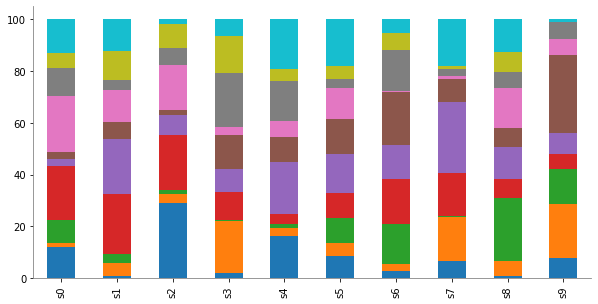

In [197]:
fig, axn = plt.subplots(1,1,figsize=(10,5))

df.T.plot(kind='bar', stacked = True, legend=False, ax=axn)

# remove all grids, backrounds etc ...
axn.set_facecolor('white')
axn.set_axisbelow(True)
axn.spines['right'].set_visible(False)
axn.spines['left'].set_visible(True)
axn.spines['bottom'].set_visible(True)
axn.spines['top'].set_visible(False)
for child in axn.get_children():
    if isinstance(child, matplotlib.spines.Spine):
        child.set_color('grey')

# save the figure to file
plt.savefig('figs/all-stacked.pdf',dpi=600, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
        
plt.show()


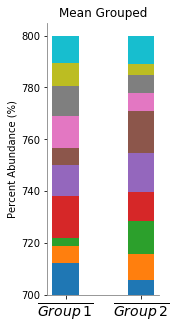

In [198]:
fig, axn = plt.subplots(1,1,figsize=(2,5))

width = 0.35       # the width of the bars
mg1_ = pd.DataFrame(df.iloc[:, :len(df.columns)//2].mean(axis=1)).values.flatten()
mg2_ = pd.DataFrame(df.iloc[:, -len(df.columns)//2:].mean(axis=1)).values.flatten()

stg1_ = pd.DataFrame(df.iloc[:, :len(df.columns)//2].std(axis=1)).values.flatten()
stg2_ = pd.DataFrame(df.iloc[:, -len(df.columns)//2:].std(axis=1)).values.flatten()

ind_ = pd.DataFrame(df.T.mean(axis=0)).index

tot_means = (0, 0)
for m1_, m2_, s1_, s2_ in zip(mg1_, mg2_, stg1_, stg2_):
    axn.bar((0, 1), (m1_, m2_), width, bottom=tot_mean)
    tot_mean += (m1_, m2_)

axn.set_ylabel('Percent Abundance (%)')
axn.set_title('Mean Grouped')
plt.xticks([0, 1], ['$\\overline{Group\,1}$',
                    '$\\overline{Group\,2}$'], fontsize=14)

# remove all grids, backrounds etc ...
axn.set_facecolor('white')
axn.set_axisbelow(True)
axn.spines['right'].set_visible(False)
axn.spines['left'].set_visible(True)
axn.spines['bottom'].set_visible(True)
axn.spines['top'].set_visible(False)
for child in axn.get_children():
    if isinstance(child, matplotlib.spines.Spine):
        child.set_color('grey')
    

# save the figure to file
plt.savefig('figs/mean-grouped.pdf',dpi=600, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
        
plt.show()


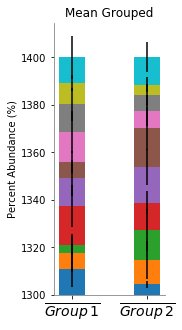

In [235]:
fig, axn = plt.subplots(1,1,figsize=(2,5))

width = 0.35       # the width of the bars
mg1_ = pd.DataFrame(df.iloc[:, :len(df.columns)//2].mean(axis=1)).values.flatten()
mg2_ = pd.DataFrame(df.iloc[:, -len(df.columns)//2:].mean(axis=1)).values.flatten()

stg1_ = pd.DataFrame(df.iloc[:, :len(df.columns)//2].std(axis=1)).values.flatten()
stg2_ = pd.DataFrame(df.iloc[:, -len(df.columns)//2:].std(axis=1)).values.flatten()

ind_ = pd.DataFrame(df.T.mean(axis=0)).index

tot_means = (0, 0)
for m1_, m2_, s1_, s2_ in zip(mg1_, mg2_, stg1_, stg2_):
    axn.bar((0, 1), (m1_, m2_), width, yerr=(s1_, s2_), bottom=tot_mean)
    tot_mean += (m1_, m2_)

axn.set_ylabel('Percent Abundance (%)')
axn.set_title('Mean Grouped')
plt.xticks([0, 1], ['$\\overline{Group\,1}$',
                    '$\\overline{Group\,2}$'], fontsize=14)

# remove all grids, backrounds etc ...
axn.set_facecolor('white')
axn.set_axisbelow(True)
axn.spines['right'].set_visible(False)
axn.spines['left'].set_visible(True)
axn.spines['bottom'].set_visible(True)
axn.spines['top'].set_visible(False)
for child in axn.get_children():
    if isinstance(child, matplotlib.spines.Spine):
        child.set_color('grey')

# save the figure to file
plt.savefig('figs/std-grouped.pdf',dpi=600, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
        
plt.show()

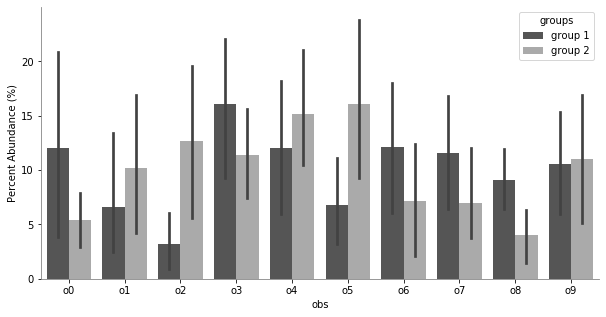

In [208]:
fig, axn = plt.subplots(1,1,figsize=(10,5))

df_group = pd.DataFrame(df.stack()).reset_index()
df_group.columns = ['obs','samps','props']
g1_ = sorted(set(df_group.samps))[:len(set(df_group.samps))//2]
g2_ = sorted(set(df_group.samps))[-len(set(df_group.samps))//2:]
df_group['groups'] = ['group 1' if i in g1_ else 'group 2' for i in df_group.samps]

sns.barplot(x='obs',y='props', hue='groups', data=df_group, ax=axn, palette='gray')

# remove all grids, backrounds etc ...
axn.set_facecolor('white')
axn.set_axisbelow(True)
axn.spines['right'].set_visible(False)
axn.spines['left'].set_visible(True)
axn.spines['bottom'].set_visible(True)
axn.spines['top'].set_visible(False)
for child in axn.get_children():
    if isinstance(child, matplotlib.spines.Spine):
        child.set_color('grey')
    
axn.set_ylabel('Percent Abundance (%)')

# save the figure to file
plt.savefig('figs/sep-feat-std.pdf',dpi=600, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()
